<h1> Data Spaces' Tesina <h1>

<p>Imports section<p>

In [35]:
import numpy as np
import pandas as pd
from sklearn import neighbors, model_selection, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

<p> Read .csv file <p>

In [47]:
filename = "dataR2.csv"
file = open(filename, "r")

labels = np.loadtxt(file, delimiter=",", dtype='str', encoding=None, usecols=(0,1,2,3,4,5,6,7,8,9), max_rows=1)
data = np.loadtxt(file, delimiter=",", dtype=None, encoding=None, usecols=(0,1,2,3,4,5,6,7,8,9))
data = pd.DataFrame(data = data, columns=labels)

# Let's divide data into source and target (respectively X and Y)
X = data.iloc[:, 0:9]
Y = data.iloc[:, 9]

# records with the classification as "1" are Healthy Controls, "2" means Patients.

<p>Dataset Analysis - find and remove outliers</p>

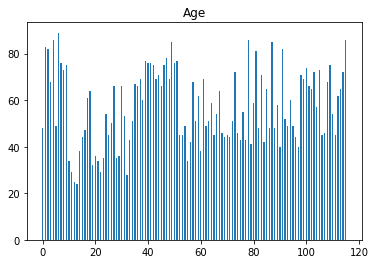

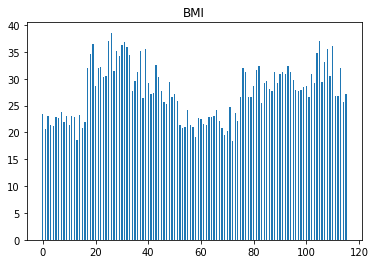

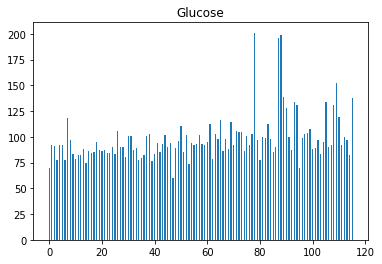

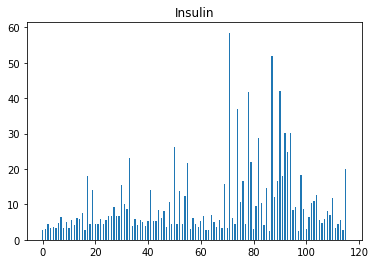

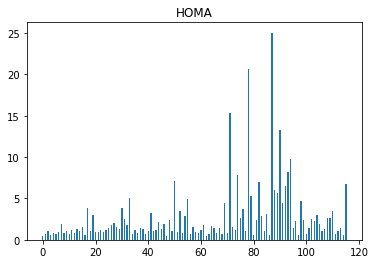

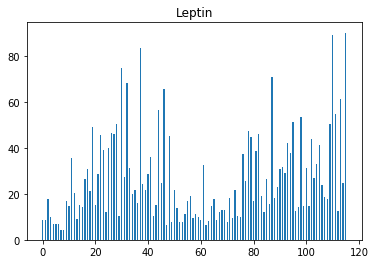

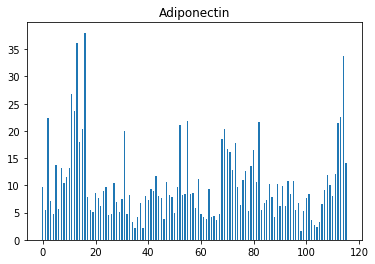

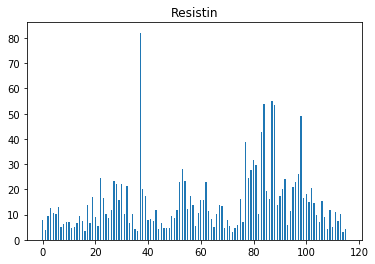

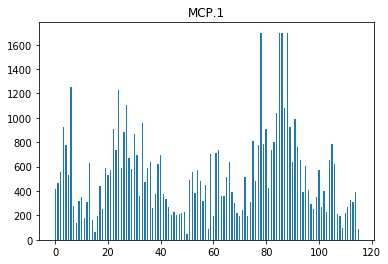

In [48]:
# find outliers
for feature in X.columns: 
    plt.bar(np.arange(X.shape[0]), X[feature], 0.5)
    plt.title(feature)
    plt.show()

<p><p>Preprocessing<p></p>

In [26]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=np.random.randint(0,100), test_size=0.27)

# array of possible K to apply KNN neighbors
ks = [3,5,7,9]

# normalize data because algorithms work better with normalized data
# scaler = preprocessing.StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

<p><u>K-NN</u></p>

In [27]:
for k in ks:
    n_neighbors = k
    
    # Create an instance of neighbors classifier (clf) and fit the data
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    
    # train the classifier on the training set
    clf.fit(X_train, Y_train)
    
    print("Accuracy score on the test set with K =",n_neighbors,"is %.3f" %(clf.score(X_test, Y_test)))


    

Accuracy score on the test set with K = 3 is 0.750
Accuracy score on the test set with K = 5 is 0.656
Accuracy score on the test set with K = 7 is 0.625
Accuracy score on the test set with K = 9 is 0.625


<p><u>Logistic Regression</u><p>

In [28]:
logReg = LogisticRegression(solver="lbfgs", max_iter=2000) # instance of the model

logReg.fit(X_train, Y_train)

# res = logReg.predict(X_test)

print("Accuracy: ", logReg.score(X_test, Y_test))
print(classification_report(Y_test, logReg.predict(X_test)))

Accuracy:  0.71875
              precision    recall  f1-score   support

         1.0       0.78      0.50      0.61        14
         2.0       0.70      0.89      0.78        18

    accuracy                           0.72        32
   macro avg       0.74      0.69      0.69        32
weighted avg       0.73      0.72      0.71        32



<p><u> Random forest</u> </p>

In [29]:
rndFor = RandomForestClassifier(n_estimators = 200, criterion="entropy")

rndFor.fit(X_train, Y_train)

y_pred = rndFor.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  0.71875


<p><u> SVM</u> </p>

In [30]:
svc = SVC(gamma='auto', kernel='rbf')
svc.fit(X_train, Y_train)
print("Accuracy: ", svc.score(X_test, Y_test))

Accuracy:  0.5625


<p> So this is the accuracy with the default parameters, but with SVm approach is necessary to perform some parameters tuning in order to achieve a better result. To do so I relied on the GridSearch <p>
<p><u> SVM with GridSearch </u></p>

In [31]:
parameters = [{'C': [0.1, 0.2, 1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [0.1, 0.2, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.25, 1], 'kernel': ['rbf']}]
svcGS = GridSearchCV(svc, parameters, n_jobs=-1, cv=5, refit=True)
svcGS.fit(X_train, Y_train)
# print("Accuracy: ", svcGS.score(X_test, Y_test))
print(classification_report(Y_test, svcGS.predict(X_test)),"\n")
cm = metrics.confusion_matrix(Y_test, svcGS.predict(X_test))

print ("Confusion Matrix:\n",cm)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, svcGS.predict(X_test), pos_label=2)
print("Area Under the ROC curve: ",metrics.auc(fpr, tpr))                                         

              precision    recall  f1-score   support

         1.0       0.73      0.57      0.64        14
         2.0       0.71      0.83      0.77        18

    accuracy                           0.72        32
   macro avg       0.72      0.70      0.70        32
weighted avg       0.72      0.72      0.71        32
 

Confusion Matrix:
 [[ 8  6]
 [ 3 15]]
Area Under the ROC curve:  0.7023809523809524


<p> The result above shows us a fuller report. </p>